<a href="https://colab.research.google.com/github/gmkumar1988/Cluster-Analysis/blob/main/ML_Regression_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set(style = 'whitegrid')

In [ ]:
#Generate Synthetic Dataset
from sklearn.datasets import make_regression

In [ ]:
X,y = make_regression(n_samples = 100, n_features = 1, noise = 20,bias = 200,random_state = 42)

In [ ]:
if(X.shape[1] == 1):
  feature_names = ['X']
else:
  feature_names = ['X' + str(i) for i in range(X_shape[1])]

df = pd.DataFrame(X,columns = feature_names)
df['y'] = y


In [ ]:
df.head()

,X,y
0,0.931280,262.687202
1,0.087047,176.236019
2,-1.057711,174.313234
3,0.314247,207.936457
4,-0.479174,184.524505


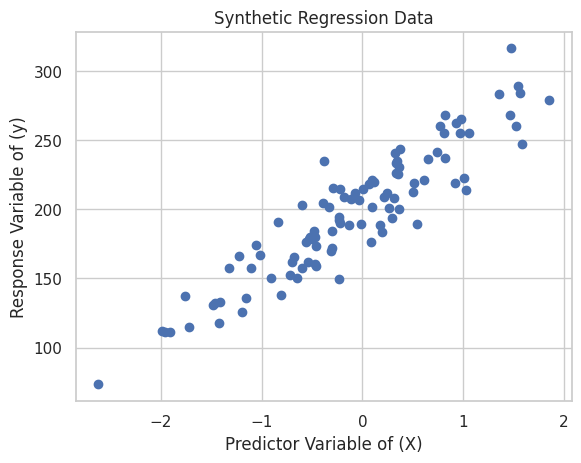

In [ ]:
plt.scatter(X,y)
plt.xlabel('Predictor Variable of (X)')
plt.ylabel('Response Variable of (y)')
plt.title('Synthetic Regression Data')
plt.show()

In [ ]:
#Linear Regression Modeling
#Fit a linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)
residuals = y - y_pred

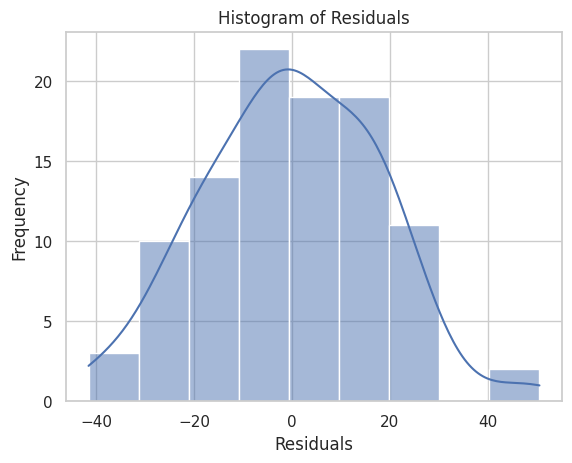

In [ ]:
sns.histplot(residuals,kde = True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [ ]:
### Calculate the metrics

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [ ]:
mae = mean_absolute_error(y,y_pred)
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y,y_pred)

In [ ]:
n = len(y)

In [ ]:
p = X.shape[1]
adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)

In [ ]:
###Create a dataframe to display metrics

In [ ]:
metrics_df = pd.DataFrame({'Metric':['MAE','MSE','RMSE','R2','Adjusted R2'],'Value':[mae,mse,rmse,r2,adj_r2]})

In [ ]:
print(metrics_df)

        Metric       Value
0          MAE   14.208986
1          MSE  312.217002
2         RMSE   17.669663
3           R2    0.853154
4  Adjusted R2    0.851656


In [ ]:
### Machine learning pipelines in Python

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
myseed_list = [6,28,2,49,29,39,23,12,84,12]
myseed_len = len(myseed_list)

In [ ]:
### Function to run the pipeline repeatedly

In [ ]:
def run_pipeline(n_runs = 10):
  rmse_list = []
  r2_list = []
  seed_list = []


  for i in range(n_runs):
    seed = myseed_list[i%myseed_len]
    np.random.seed(seed)
    X,y = make_regression(n_samples = 100, n_features = 1, noise = 20,bias = 200,random_state = 42)

    ### Define pipeline processing + model :
    pipeline = Pipeline([('scaler',StandardScaler()),('regressor',LinearRegression())])

    ### Fit the pipeline
    pipeline.fit(X,y)

    ### Predict and evaluate
    y_pred = pipeline.predict(X)
    rmse = np.sqrt(mean_squared_error(y,y_pred))
    r2 = r2_score(y,y_pred)

    rmse_list.append(rmse)
    r2_list.append(r2)
    seed_list.append(seed)

  return rmse_list, r2_list, seed_list

In [ ]:
### Define pipeline processing + model :
pipeline = Pipeline([('scaler',StandardScaler()),('regressor',LinearRegression())])

In [ ]:
### Fit the pipeline
pipeline.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [ ]:
### Predict and evaluate
y_pred = pipeline.predict(X)
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)

In [ ]:
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

RMSE: 17.67
R2: 0.85


In [ ]:
rmse_results, r2_results, seed_results = run_pipeline(n_runs=10)
print("RMSE results:", rmse_results)
print("R2 results:", r2_results)
print("Seed results:", seed_results)

RMSE results: [np.float64(17.66966331555177), np.float64(17.66966331555177), np.float64(17.66966331555177), np.float64(17.66966331555177), np.float64(17.66966331555177), np.float64(17.66966331555177), np.float64(17.66966331555177), np.float64(17.66966331555177), np.float64(17.66966331555177), np.float64(17.66966331555177)]
R2 results: [0.853154207317982, 0.853154207317982, 0.853154207317982, 0.853154207317982, 0.853154207317982, 0.853154207317982, 0.853154207317982, 0.853154207317982, 0.853154207317982, 0.853154207317982]
Seed results: [6, 28, 2, 49, 29, 39, 23, 12, 84, 12]


In [ ]:
result_df = run_pipeline(n_runs=10)

In [ ]:
result_df

([np.float64(17.66966331555177),
  np.float64(17.66966331555177),
  np.float64(17.66966331555177),
  np.float64(17.66966331555177),
  np.float64(17.66966331555177),
  np.float64(17.66966331555177),
  np.float64(17.66966331555177),
  np.float64(17.66966331555177),
  np.float64(17.66966331555177),
  np.float64(17.66966331555177)],
 [0.853154207317982,
  0.853154207317982,
  0.853154207317982,
  0.853154207317982,
  0.853154207317982,
  0.853154207317982,
  0.853154207317982,
  0.853154207317982,
  0.853154207317982,
  0.853154207317982],
 [6, 28, 2, 49, 29, 39, 23, 12, 84, 12])

In [ ]:
pd.DataFrame(result_df)

,0,1,2,3,4,5,6,7,8,9
0,17.669663,17.669663,17.669663,17.669663,17.669663,17.669663,17.669663,17.669663,17.669663,17.669663
1,0.853154,0.853154,0.853154,0.853154,0.853154,0.853154,0.853154,0.853154,0.853154,0.853154
2,6.000000,28.000000,2.000000,49.000000,29.000000,39.000000,23.000000,12.000000,84.000000,12.000000


Model Validation : Visual Representation - Train/ Validation/ Test Split - Train (60%) - Validation (20%) - Testing (20%)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set(style = 'whitegrid')

In [3]:
# Select the random seed for reproducibility
np.random.seed(42)

In [4]:
# Generate 100 random 20 points
points = np.random.rand(100, 2)

In [5]:
# Create a dataframe for the points
df = pd.DataFrame(points, columns=['X', 'Y'])

In [6]:
labels = ['train'] *60  + ['test'] * 20 + ['validation'] * 20
np.random.shuffle(labels)
df['set'] = labels

In [10]:
# Generate plot with two train-validate-test splits
### Setup font size and marker
sns.set_context('talk')
market_size = 100

In [11]:
## Get first three colors from the set2 palette
set2_colors = sns.color_palette('Set2', 3)

#Create palette dictionary
palette_dict = {
    'train': set2_colors[0],
    'test': set2_colors[1],
    'validation': set2_colors[2]
}

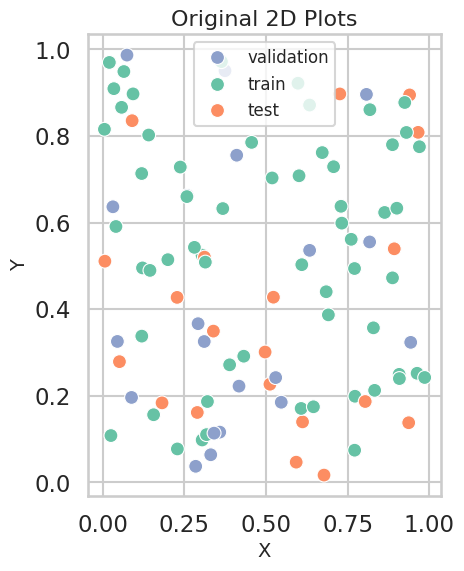

In [12]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='X', y='Y', hue='set', palette=palette_dict, s=market_size)
plt.title('Original 2D Plots', fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.legend(fontsize=12)

In [13]:
# Let's do the train-validate-test split using scikit learn
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.datasets import make_regression
n_samples = 1000

X, y = make_regression(n_samples=n_samples, ## how many rows of data to generate
                       n_features=1,        ## i.e., how many X variables
                       noise=20,            ## i.e., how much error to introduce
                       bias=200,            ## i.e., what is the intercept
                       random_state=42)     ## for reproducibility

# Convert X and y to a DataFrame
if (X.shape[1] == 1):
    feature_names = ['X']
else:
    feature_names = [f'X{i+1}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['y'] = y     # Add the target variable as a new column

df.head()

,X,y
0,-1.758739,163.915051
1,1.031845,189.727583
2,-0.487606,172.305940
3,0.186454,188.896813
4,0.725767,214.055202


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df[['X']],       # X data points, can be multiple X variables
                                                    df['y'],         # y data points
                                                    test_size=0.4,   # train-test split = 60-40
                                                    random_state=42) # seed for reproducibility

In [16]:
print("Original dataset size:", X.shape)
print("Train dataset size:   ", X_train.shape)
print("Test dataset size:    ", X_test.shape)

Original dataset size: (1000, 1)
Train dataset size:    (600, 1)
Test dataset size:     (400, 1)


In [17]:
X_validate, X_test2, y_validate, y_test2 = train_test_split(X_test,         # X data points, can be multiple X variables
                                                            y_test,         # y data points
                                                            test_size=0.5,  # validate-test split = 50-50 (of 40%)
                                                            random_state=42) # seed for reproducibility


In [18]:
print("Original dataset size:   ", X.shape)
print("Train dataset size:      ", X_train.shape)
print("Old test dataset size:   ", X_test.shape)
print("New test dataset size:   ", X_test2.shape)
print("Validation dataset size: ", X_validate.shape)

Original dataset size:    (1000, 1)
Train dataset size:       (600, 1)
Old test dataset size:    (400, 1)
New test dataset size:    (200, 1)
Validation dataset size:  (200, 1)


KeyError: 'validate'

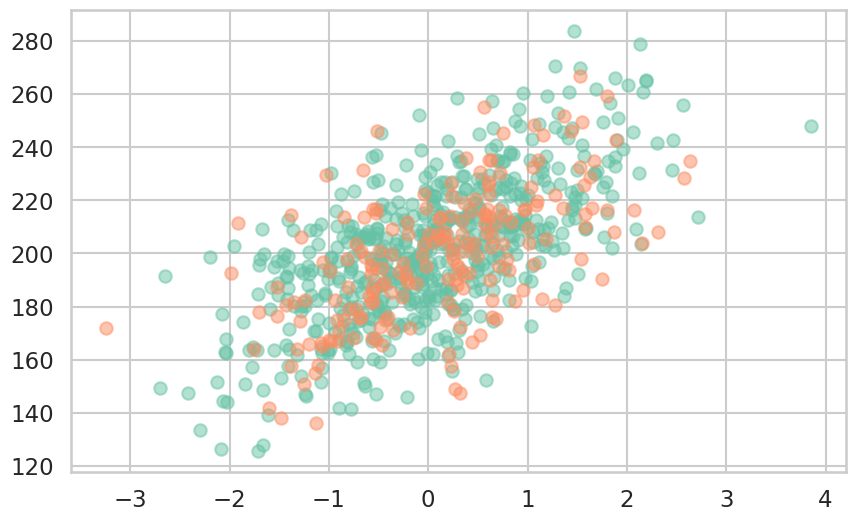

In [19]:
# Visualize the train-validate-test split
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color=palette_dict['train'], label='Train set', alpha=0.5)
plt.scatter(X_test2, y_test2, color=palette_dict['test'], label='Test set', alpha=0.5)
plt.scatter(X_validate, y_validate, color=palette_dict['validate'], label='Validate set', alpha=0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Train-Validate-Test Split Visualization ({n_samples} samples)')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
myseed_list = [6, 28, 25, 42, 66, 210, 412, 2025, 2120, 6101]
myseed_len = len(myseed_list)

X = df[['X']]  # can hold many X variables in the general case
y = df['y']

# Function to run the pipeline repeatedly
def run_pipeline(n_runs=10):
    rmse_list = []
    r2_list = []
    seed_list = []

    for i in range(n_runs):
        # Select a new seed each time
        myseed = myseed_list[i % myseed_len]   # use the modulo operator to ensure we don't go outside bounds

        # Split the data differently each time
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=myseed
        )

        # Define pipeline: preprocessing + model
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', LinearRegression())
        ])

        # Fit the pipeline
        pipeline.fit(X_train, y_train)

        # Predict and evaluate
        y_pred = pipeline.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        rmse_list.append(rmse)
        r2_list.append(r2)

        seed_list.append(myseed)

        print(f"Run {i+1}: seed = {myseed}, RMSE = {rmse:.2f}, R² = {r2:.2f}")

    return pd.DataFrame({'seed': seed_list, 'RMSE': rmse_list, 'R2': r2_list})

In [22]:
# Run the pipeline 10 times
results_df = run_pipeline(n_runs=10)

Run 1: seed = 6, RMSE = 19.73, R² = 0.35
Run 2: seed = 28, RMSE = 20.18, R² = 0.41
Run 3: seed = 25, RMSE = 19.09, R² = 0.37
Run 4: seed = 42, RMSE = 20.77, R² = 0.38
Run 5: seed = 66, RMSE = 18.66, R² = 0.43
Run 6: seed = 210, RMSE = 19.72, R² = 0.38
Run 7: seed = 412, RMSE = 18.88, R² = 0.34
Run 8: seed = 2025, RMSE = 20.18, R² = 0.32
Run 9: seed = 2120, RMSE = 20.71, R² = 0.27
Run 10: seed = 6101, RMSE = 20.23, R² = 0.25


In [23]:
results_df

,seed,RMSE,R2
0,6,19.734112,0.352224
1,28,20.178028,0.410361
2,25,19.091601,0.368564
3,42,20.774977,0.375735
4,66,18.663206,0.433356
5,210,19.718442,0.384213
6,412,18.879577,0.338889
7,2025,20.184565,0.319890
8,2120,20.711549,0.272737
9,6101,20.229177,0.252358


In [24]:
# Train and evaluate on the entire dataset
model_all = LinearRegression()
model_all.fit(df[['X']], df['y'])
y_pred_all = model_all.predict(df[['X']])

# Evaluate RMSE and R^2
rmse_all = np.sqrt(mean_squared_error(df['y'], y_pred_all))
r2_all = r2_score(df['y'], y_pred_all)

print(f'All Data RMSE (train on all data): {rmse_all:.4f}')
print(f'All Data R^2 (train on all data): {r2_all:.4f}')

All Data RMSE (train on all data): 19.8008
All Data R^2 (train on all data): 0.4000


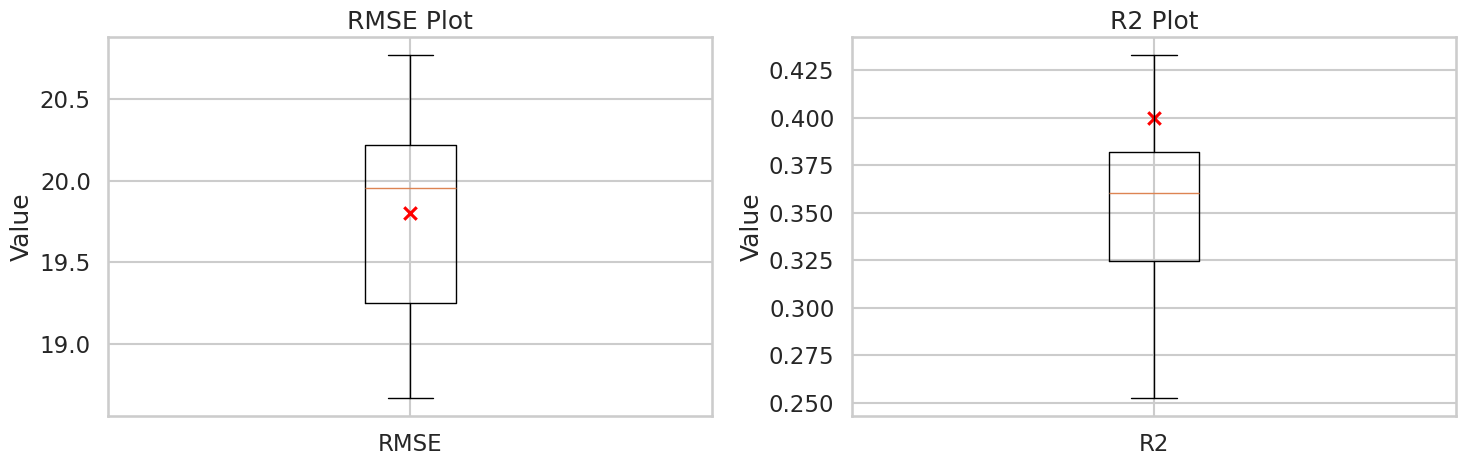

In [25]:
# Set up subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Box plot for RMSE
axes[0].boxplot(results_df['RMSE'])
axes[0].scatter(1, rmse_all, color='red', marker='x', label='ALL DATA')  # x=1 since there's only one box
axes[0].set_title('RMSE Plot')
axes[0].set_ylabel('Value')
axes[0].set_xticks([1])
axes[0].set_xticklabels(['RMSE'])

# Box plot for R2
axes[1].boxplot(results_df['R2'])
axes[1].scatter(1, r2_all, color='red', marker='x', label='ALL DATA')  # x=1 since there's only one box
axes[1].set_title('R2 Plot')
axes[1].set_ylabel('Value')
axes[1].set_xticks([1])
axes[1].set_xticklabels(['R2'])

plt.tight_layout()
plt.show()

In [26]:
mytest_list = [0.50, 0.40, 0.30, 0.25, 0.20, 0.15, 0.10, 0.05, 0.02, 0.01]
mytest_len = len(mytest_list)

X = df[['X']]  # can hold many X variables in the general case
y = df['y']

# Function to run the pipeline repeatedly
def run_pipeline(n_runs=10):
    rmse_list = []
    r2_list = []
    test_list = []

    for i in range(n_runs):
        # Select a new train-test split each time
        mytest = mytest_list[i % mytest_len]   # use the modulo operator to ensure we don't go outside bounds

        # Split the data differently each time
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=mytest, random_state=42
        )

        # Define pipeline: preprocessing + model
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', LinearRegression())
        ])

        # Fit the pipeline
        pipeline.fit(X_train, y_train)

        # Predict and evaluate
        y_pred = pipeline.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        rmse_list.append(rmse)
        r2_list.append(r2)

        test_list.append(mytest)

        print(f"Run {i+1}: test = {mytest}, RMSE = {rmse:.2f}, R² = {r2:.2f}")

    return pd.DataFrame({'test': test_list, 'RMSE': rmse_list, 'R2': r2_list})

In [27]:
# Run the pipeline 10 times
results_df = run_pipeline(n_runs=10)

Run 1: test = 0.5, RMSE = 19.72, R² = 0.36
Run 2: test = 0.4, RMSE = 20.24, R² = 0.36
Run 3: test = 0.3, RMSE = 20.43, R² = 0.36
Run 4: test = 0.25, RMSE = 20.49, R² = 0.36
Run 5: test = 0.2, RMSE = 20.77, R² = 0.38
Run 6: test = 0.15, RMSE = 20.57, R² = 0.35
Run 7: test = 0.1, RMSE = 21.41, R² = 0.36
Run 8: test = 0.05, RMSE = 20.05, R² = 0.31
Run 9: test = 0.02, RMSE = 22.67, R² = 0.24
Run 10: test = 0.01, RMSE = 22.87, R² = 0.21


In [28]:
results_df

,test,RMSE,R2
0,0.50,19.717356,0.361877
1,0.40,20.235312,0.356449
2,0.30,20.433556,0.359557
3,0.25,20.491157,0.362059
4,0.20,20.774977,0.375735
5,0.15,20.572725,0.348042
6,0.10,21.409524,0.364864
7,0.05,20.052621,0.308326
8,0.02,22.670466,0.243342
9,0.01,22.871347,0.209363
